In [8]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import numpy as np

## Get the prepared ERA5 data from recent Copernicus press release

In [9]:
!wget https://climate.copernicus.eu/sites/default/files/custom-uploads/Page%20Uploads/September%2023%20CB/PR/era5_daily_series_2t_global_1940-2023.csv

--2023-11-20 22:42:01--  https://climate.copernicus.eu/sites/default/files/custom-uploads/Page%20Uploads/September%2023%20CB/PR/era5_daily_series_2t_global_1940-2023.csv
Resolving climate.copernicus.eu (climate.copernicus.eu)... 136.156.153.127
Connecting to climate.copernicus.eu (climate.copernicus.eu)|136.156.153.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 704610 (688K) [application/octet-stream]
Saving to: ‘era5_daily_series_2t_global_1940-2023.csv.9’

era5_daily_series_2 100%[===================>] 688.10K  4.26MB/s    in 0.2s    

2023-11-20 22:42:02 (4.26 MB/s) - ‘era5_daily_series_2t_global_1940-2023.csv.9’ saved [704610/704610]



In [10]:
# header is 7 lines, skip 7 rows below
!head -9 era5_daily_series_2t_global_1940-2023.csv

# Description: This file contains daily mean 2m temperature data from ERA5 averaged over the entire globe (0–360°E, 90°S–90°N) from 1940 to 2023.
# Data source: The original gridded ERA5 hourly data used to generate the time series can be downloaded from the C3S Climate Data Store (CDS) at this address:
# https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels
# Data availability: The ERA5 data available in the CDS are updated up to 5 days behind real-time. Note that the time series below includes values based on pre-release data not yet available in the CDS.
# Final vs preliminary data: The last value in the time series may be preliminary in which case it will likely change (slightly) once the final data for the day are available (typically 3 days behind real-time). The difference between the preliminary and final value is generally very small. See more details in the README file included in the folder.
# Units: deg. C
# Last updated: 04 Oct 2023
date,temp,sta

In [11]:
!tail -2 era5_daily_series_2t_global_1940-2023.csv

2023-10-01,15.94,FINAL
2023-10-02,15.89,PRELIMINARY


In [12]:
import pandas as pd
df = pd.read_csv('era5_daily_series_2t_global_1940-2023.csv', skiprows=7, parse_dates=['date'], index_col=0)
df

,temp,status
date,,
1940-01-01,11.72,FINAL
1940-01-02,11.66,FINAL
1940-01-03,11.66,FINAL
1940-01-04,11.68,FINAL
1940-01-05,11.60,FINAL
...,...,...
2023-09-28,16.13,FINAL
2023-09-29,16.07,FINAL
2023-09-30,16.01,FINAL


## Bring the data into polar coordinates (theta, r) for plotting 

In [13]:
# drop Feb 29 for easier handling of the years (all 365 days)
df365 = df[df.index.strftime('%m-%d') != '02-29']

In [14]:
# drop 2023 as well (will plot separately)
df365 = df365[df365.index.strftime('%y') != '23']
df365

,temp,status
date,,
1940-01-01,11.72,FINAL
1940-01-02,11.66,FINAL
1940-01-03,11.66,FINAL
1940-01-04,11.68,FINAL
1940-01-05,11.60,FINAL
...,...,...
2022-12-27,12.90,FINAL
2022-12-28,12.86,FINAL
2022-12-29,12.84,FINAL


In [15]:
# In the form 0 ... 364 0 ... 364 0 ...
theta = (np.arange(0,30295) % 365)
theta.max()

364

In [16]:
# Now in the form 0 ... 2pi 0 ... 2pi 0 ...
theta = theta / theta.max() * 2 * np.pi
theta.max(), 2 * np.pi

(6.283185307179586, 6.283185307179586)

In [17]:
# The temperature is the distance/radius from the origin
r = df365.temp
r.min(), r.max()

(11.28, 16.8)

## Highlight individual years and periods

### Year 2023 so far

In [18]:
df2023 = df[df.index.strftime('%y') == '23']
df2023.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-09-23', '2023-09-24', '2023-09-25', '2023-09-26',
               '2023-09-27', '2023-09-28', '2023-09-29', '2023-09-30',
               '2023-10-01', '2023-10-02'],
              dtype='datetime64[ns]', name='date', length=275, freq=None)

In [19]:
theta2023 = (np.arange(0,df2023.index.size))
theta2023 = theta2023 / 365 * 2 * np.pi
r2023 = df2023.temp

### Year 1940

In [20]:
df1940 = df[df.index.strftime('%y') == '40']
theta1940 = (np.arange(0,df1940.index.size))
theta1940 = theta1940 / (df1940.index.size-1) * 2 * np.pi
r1940 = df1940.temp

### The 1940s for smoother Earth surface

In [21]:
df1940s = df['1940-01-01':'1949-12-31']
del df1940s['status']
df1940s

,temp
date,
1940-01-01,11.72
1940-01-02,11.66
1940-01-03,11.66
1940-01-04,11.68
1940-01-05,11.60
...,...
1949-12-27,11.85
1949-12-28,11.83
1949-12-29,11.74


In [22]:
df1940s.groupby([df1940s.index.month, df1940s.index.day]).mean()

temp
date date        
1    1     11.761
     2     11.735
     3     11.716
     4     11.711
     5     11.717
...           ...
12   27    11.804
     28    11.796
     29    11.769
     30    11.766
     31    11.759

[366 rows x 1 columns]

In [23]:
dfclim = df1940s.groupby([df1940s.index.month, df1940s.index.day]).mean()
theta1940s = (np.arange(0,dfclim.index.size))
theta1940s = theta1940s / (dfclim.index.size-1) * 2 * np.pi

In [24]:
r1940s = dfclim.temp

### 1950s to 1970s

In [25]:
dfBASE = df['1950-01-01':'1979-12-31']
del dfBASE['status']
dfBASE

,temp
date,
1950-01-01,11.68
1950-01-02,11.62
1950-01-03,11.51
1950-01-04,11.43
1950-01-05,11.42
...,...
1979-12-27,12.44
1979-12-28,12.38
1979-12-29,12.33


In [26]:
dfBASE.groupby([dfBASE.index.month, dfBASE.index.day]).mean()

temp
date date           
1    1     11.808667
     2     11.793333
     3     11.776333
     4     11.767333
     5     11.771000
...              ...
12   27    11.895000
     28    11.888000
     29    11.880000
     30    11.861000
     31    11.842000

[366 rows x 1 columns]

In [27]:
dfBASE = dfBASE.groupby([dfBASE.index.month, dfBASE.index.day]).mean()
thetaBASE = (np.arange(0,dfBASE.index.size))
thetaBASE = thetaBASE / (dfBASE.index.size-1) * 2 * np.pi

In [28]:
rBASE = dfBASE.temp

## Plotting of the Little Picture "Out of Orbit"

In [29]:
# In the form 0 ... 364 
thetaWORLD = np.arange(0,365)

# Now in the form 0 ... 2pi
thetaWORLD = thetaWORLD / thetaWORLD.max() * 2 * np.pi

In [30]:
rWORLD = 1.5 * np.ones_like(thetaWORLD)

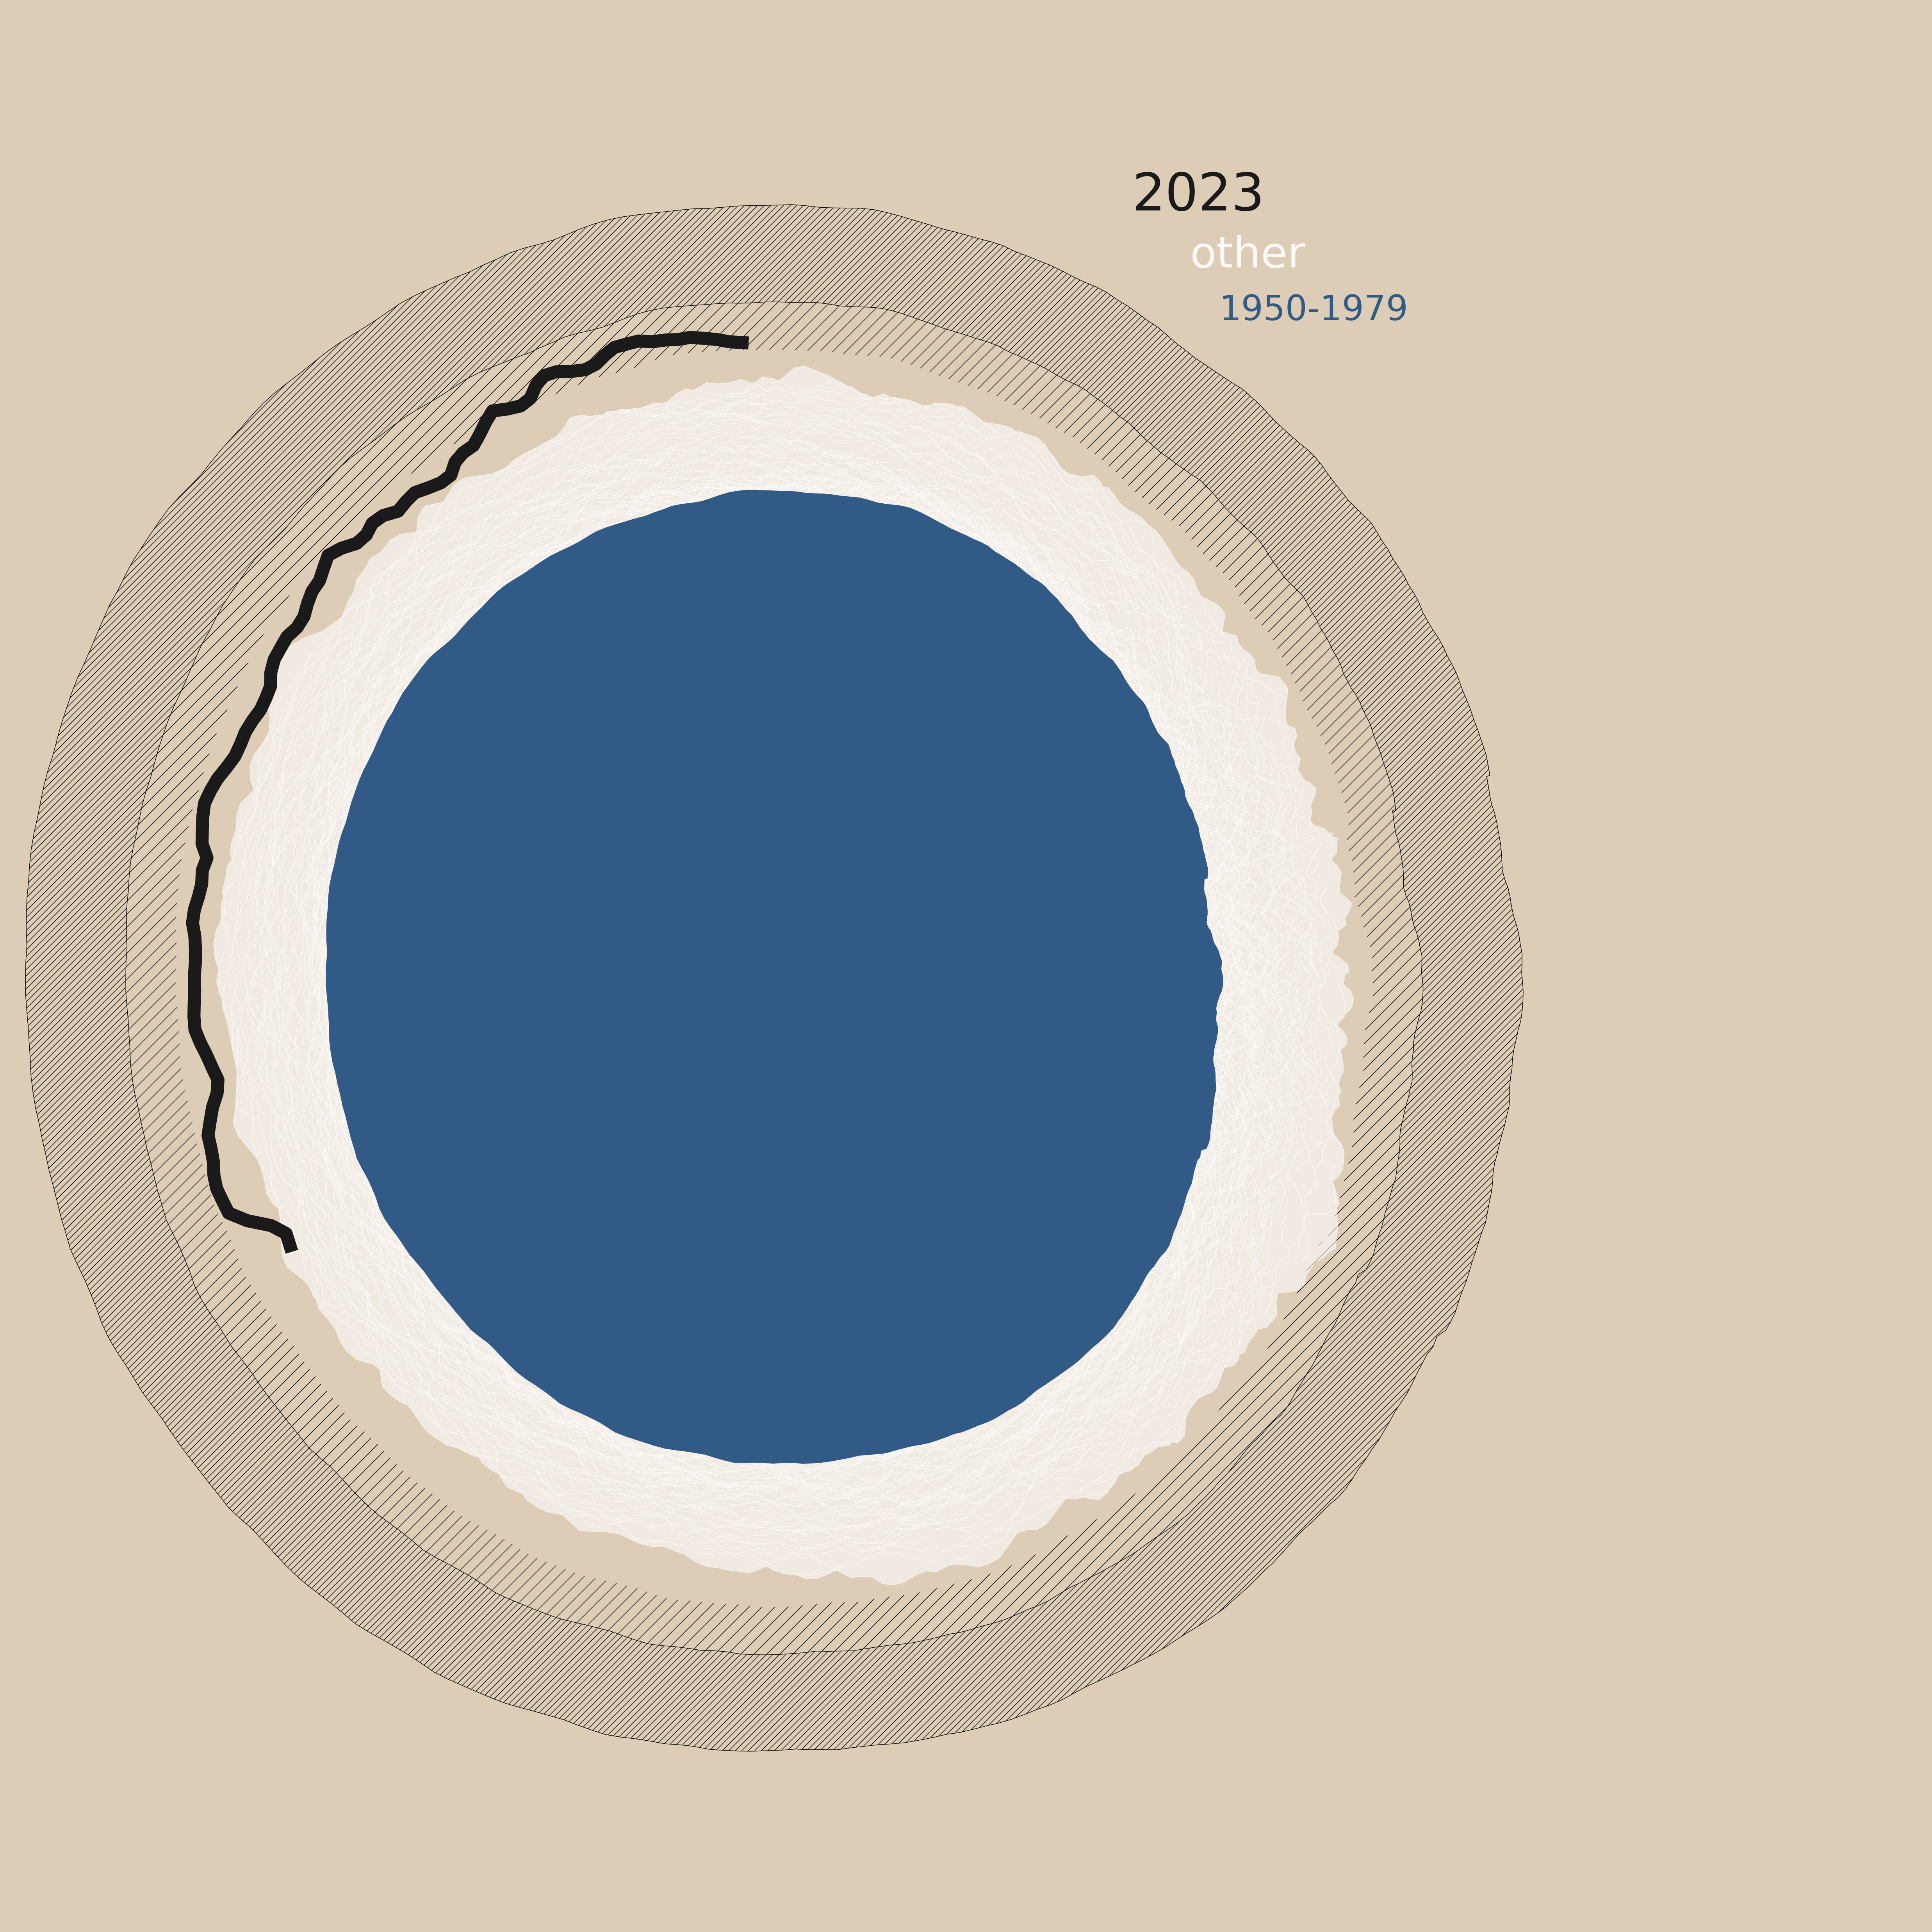

In [31]:
fig = plt.figure(figsize=(64,64), facecolor='#DDCDB7') # set background color outside the polar plot
ax = fig.add_subplot(111, projection='polar') # for complex plotting

# Same background color inside the plot
ax.set_facecolor('#DDCDB7')

# Clean up the plot
ax.set_rticks([])  # no radial ticks
ax.grid(False) # no grid lines
ax.set_xticklabels([]) # no ticklabels

ax.spines['polar'].set_visible(False) # no outer boundary of the plot

# Update the radial origin to scale 
ax.set_rorigin(df.temp.min()-2.)
# Rotate the globe so that we are out of orbit on the top
ax.set_theta_zero_location("E", offset=20)
# Clockwise plotting in the polar projection
ax.set_theta_direction(-1.)

# Scale the data
ax.set_ylim([df.temp.min()-2.,df.temp.max()+1.8]) #0.3

# The actual plotting
# Dark 2023 line
#ax.plot(theta2023, r2023, color='0.3', linewidth=16) 
ax.plot(theta2023[0:90], r2023[0:90], color='0.9', linewidth=24) 
ax.plot(theta2023[90:180], r2023[90:180], color='0.4', linewidth=24) 
ax.plot(theta2023[180:], r2023[180:], color='0.1', linewidth=24, zorder=51) # 0.3

# Clouds/atmosphere of all other years
#ax.plot(theta, r, color='white', linewidth=8, alpha=0.3) # #77B0BB
ax.fill(theta, r, linewidth=1, alpha=0.6, fill=True, color='white', zorder=49) # Colors from lake example: #315B86, #407597, #77B0BB, #11193D, #234261, #6AA2B3
# Blue fill for Earth
#ax.fill(theta1940s,r1940s,fill=True, color='#315B86', zorder=50) # Colors from lake example: #315B86, #407597, #77B0BB, #11193D, #234261, #6AA2B3
ax.fill(thetaBASE,rBASE,fill=True, color='#315B86', zorder=50) # Colors from lake example: #315B86, #407597, #77B0BB, #11193D, #234261, #6AA2B3

#other WORLDS
#ax.plot(thetaBASE[:], rBASE[:] + 1.5, color='r', linewidth=4, zorder=45) # 0.3
#other WORLDS
#ax.plot(thetaBASE[:], rBASE[:] + 2.0, color='1.0', linewidth=24) # 0.3
#other WORLDS
#ax.plot(thetaBASE[:], rBASE[:] + 3.0, color='k', linewidth=24) # 0.3

ax.fill(thetaBASE, rBASE +10.0 ,fill=True, color='#DDCDB7', zorder=39)
ax.fill(thetaBASE, rBASE +3.0 ,fill=True, color='#DDCDB7', zorder=40)
ax.fill(thetaBASE, rBASE +3.0 ,fill=False, hatch='//', zorder=41)
ax.fill(thetaBASE, rBASE +2.0 ,fill=True, color='#DDCDB7', zorder=42)
ax.fill(thetaBASE, rBASE +2.0 ,fill=False, hatch='/', zorder=43)
ax.fill(thetaBASE, rBASE +1.5 ,fill=True, color='#DDCDB7', zorder=44)

# Write the legend
ax.text(1.73*np.pi,16.2,"1950-1979", color='#315B86', fontsize=64, zorder=60)
ax.text(1.71*np.pi,16.6,"other", color='white', alpha=0.9, fontsize=80, zorder=60)
ax.text(1.68*np.pi,17.,"2023", color='0.1', fontsize=96, zorder=60)


plt.savefig('LittlePicture_ERA5_global_2t_worlds.pdf')
plt.show()